# Майнор по Анализу Данных, Группа ИАД-2
## 15/02/2017 Линейная регрессия, градиентный спуск

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [ ]:
try:
    from ipywidgets import interact, IntSlider, fixed
    from utils import *
except ImportError:
    print u'Так надо'

# Постановка задачи

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана **вещественная** зависимая переменная, которая тоже имеет отношение к этим объекам: $y \in \mathbb{R}^n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$
То есть необходимо оценить коэффициенты $\beta_i$.

В случае линейной регрессии коэффициенты $\beta_i$ рассчитываются так, чтобы минимизировать сумму квадратов ошибок по всем наблюдениям:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

## Пример: Стоимость автомобиля

Загрузите [тренировочные данные](http://bit.ly/1gIQs6C) и [тестовые данные](http://bit.ly/IYPHrK) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

In [3]:
df_train = pd.read_csv('http://bit.ly/1gIQs6C')
df_test = pd.read_csv('http://bit.ly/IYPHrK')

Выберем одну переменную mileage в качестве предиктора, а переменную price в качестве зависимой переменной

In [4]:
df_train.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


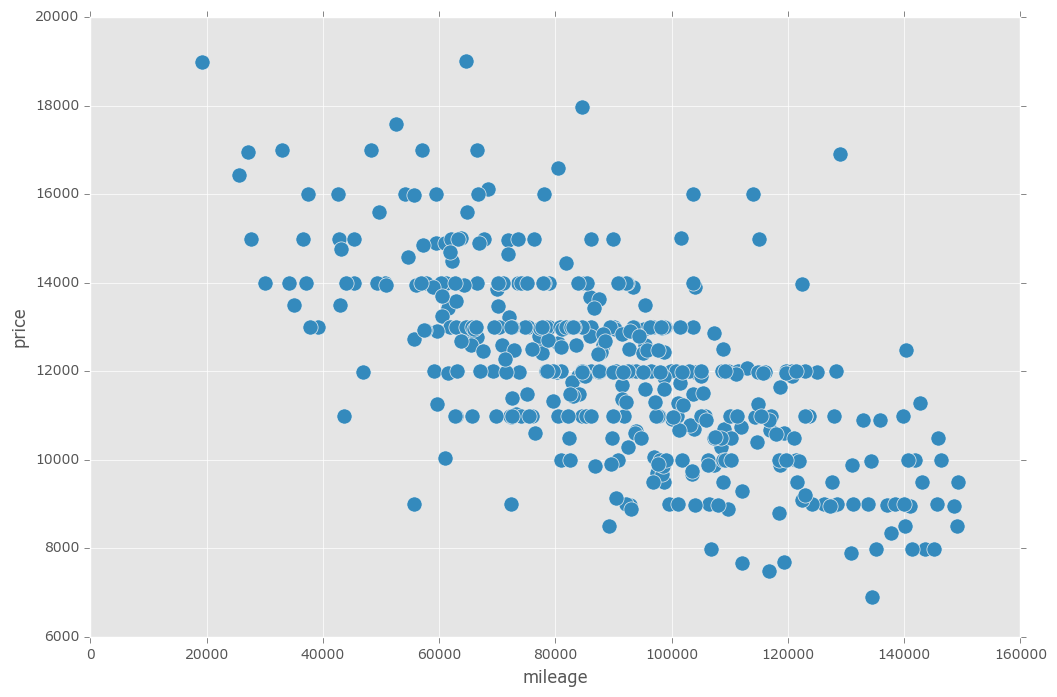

In [8]:
df_train.plot(x='mileage', y='price', kind='scatter', s=120)

In [9]:
from sklearn.linear_model import LinearRegression

Обучим модель

In [10]:
model = LinearRegression(fit_intercept=True)

In [11]:
X = df_train.loc[:, ['mileage']].values
y = df_train.loc[:, 'price'].values

In [12]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print 'Модель:\nprice = %.2f + (%.2f)*mileage' % (model.intercept_, model.coef_[0])

Модель:
price = 16762.02 + (-0.05)*mileage


Нарисуйте предсказание модели вместе с данными на плоскости

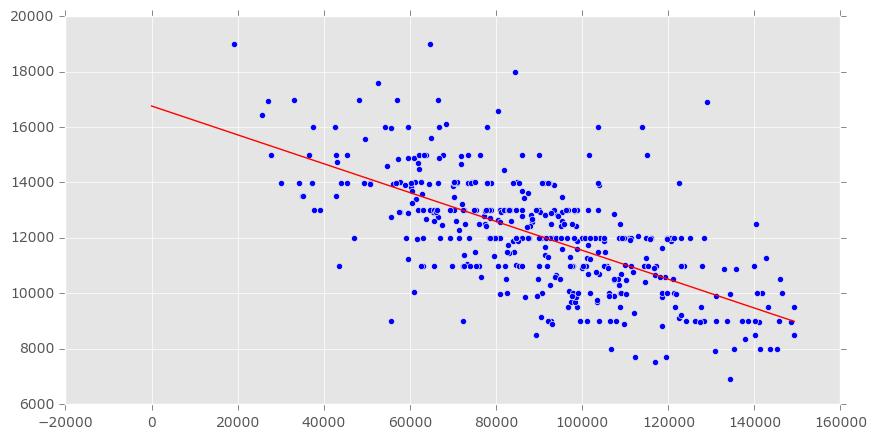

In [14]:
x = np.linspace(0, max(X), 100)
y_line = model.intercept_ + model.coef_[0]*x

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X, y)

ax.plot(x, y_line, c='red')

### Остатки и меры качества

Давайте взглянем на ошибки (остатки)

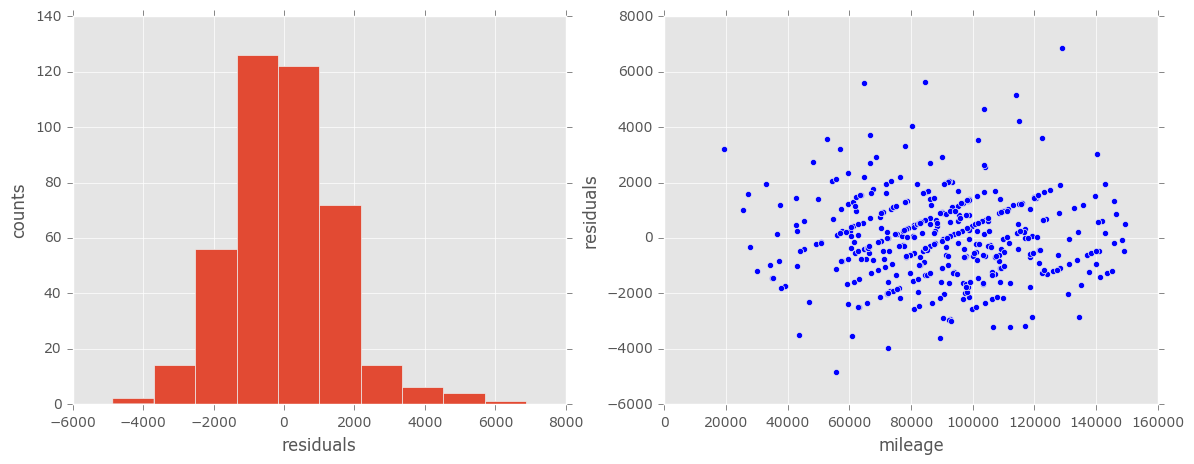

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

y_hat = model.predict(X)
res = y - y_hat
ax[0].hist(res)
ax[0].set_xlabel('residuals')
ax[0].set_ylabel('counts')

ax[1].scatter(X, res)
ax[1].set_xlabel('mileage')
ax[1].set_ylabel('residuals')


Важно смотреть на остатки.<br/> 
Во-первых, они должны быть нормально распределены (Теорема Гаусса-Маркова).<br/>
Во-вторых, не должно быть ярких зависимостей между значениями признака и остатками.<br/>
Ну и там на самом деле много условий

Посмотрим на меры качества

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Можно посчитать простые варианты агрегирования остатков, например:

* $\frac{1}{n} \sum_i |\hat{y}^{(i)}-y^{(i)}|$ - средняя абсолютная ошибка
* $\frac{1}{n} \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ - средняя квадратичная ошибка

In [17]:
print 'Средняя абсолютная ошибка %.2f' % mean_absolute_error(y, y_hat)
print 'Средняя квадратичная ошибка %.2f' % mean_squared_error(y, y_hat)

Средняя абсолютная ошибка 1182.21
Средняя квадратичная ошибка 2412292.55


Можно рассмотреть более сложную меру: коэффициент детерминации $R^2$:

* $TSS = \sum_i (y^{(i)}-\bar{y})^2$ - общая сумма квадратов (total sum of squares)
* $RSS = \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ - сумма квадратов остатков (residual sum of squares)
* $ESS = \sum_i (\hat{y}^{(i)}-\bar{y})^2$ - объясненная сумма квадратов (explained sum of squares)

Для простоты будем считать, что
$$TSS = ESS + RSS$$

Тогда Коэффициент детерминации $R^2=1-\frac{RSS}{TSS}$

Рассчитайте его для нашей модели


In [18]:
r2_score(y, y_hat)

0.43096955626446265

## Преобразование переменных

### Нормализация

Как мы с вами убедились из ДЗ2, может решить всё)
Переход к близким или единым шкалам улучшает сходимость градиентного спуска, уменьшает риск переполнения разрядности чисел, однако приходится жертвовать прямой интерпретируемостью..

Нормализацию обычно проделывают для вещественных признаков.

Нормализация z-score:
1. Вычитаем среднее: $x - \bar{x}$
2. Делим на стандартное отклонение: $\frac{x - \bar{x}}{std(x)}$

Можно проделать вручную, можно с помошью метода ниже

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print 'Модель:\nprice = %.2f + (%.2f)*mileage`' % (model.intercept_, model.coef_[0])

Модель:
price = 12084.24 + (-1351.67)*mileage`


### Природа зависимости

Далеко не всегда переменные зависят друг от друга именно в том виде, в котором они даны. Никто не запрещает зависимость вида
$$\log(y) = \beta_0 + \beta_1\log(x_1)$$
или
$$y = \beta_0 + \beta_1\frac{1}{x_1}$$
или
$$y = \beta_0 + \beta_1\log(x_1)$$
или
$$y = \beta_0 + \beta_1 x_1^2 + \beta_2 x_2^2 + \beta_3 x_1x_2 $$
и т.д.

Не смотря на то, что могут возникать какие-то нелинейные функции - всё это сводится к **линейной** регрессии (например, о втором пункте, произведите замену $z_1 = \frac{1}{x_1}$)

#### Пример: Вес тела - мозгов

Загрузите [данные](https://www.dropbox.com/s/837utfb6yh4x8xb/weights.csv?dl=0) и информацией о весах мозга и тел различных биологических видов. Вес тела задан в килограммах, вес могза в граммах.

In [ ]:
df = pd.read_csv('weights.csv', sep=';', index_col=0)
df.head()

In [ ]:
df.plot(x = 'body_w', y='brain_w', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[:2])
# Должно получится что-то несуразное..

Теперь давайте возьмем логарифм от обеих переменных и сонова нарисуем их на графике

In [ ]:
# Your Code Here


## Как обучать линейную регрессию?
Попробуем разобраться без всяких `.predict()` и `.fit()`

## Рассмотрим случай с одним признаком и свободным членом

$X$ - признаковое описание наблюдений,<br\> $y$ - прогнозируемая величина

Пусть задана функция ошибки (функция потерь) $L(\cdot)$. <br\>
Нам надо построить такой функционал $f(X)$, который будет выдавать значение наиболее близкие к $y$, иначе говоря: $$L\left(f(X) - y\right) \rightarrow\min $$

Определим функцию потерь, как сумму квадратов разности выдаваемого ответа функционала и реального значения: 
$$ L(\cdot) = \frac{1}{2n}\sum_{i=1}^n(f(x^{(i)}) - y^{(i)})^2$$

Так как среди всего множества моделей мы выбрали линейную регрессию, то $$f(X) = \beta_0 + \beta_1x_1$$
Подставляем это выражение в $L(\cdot)$ и находим $\beta_0$,
$\beta_1$!

$$ L(\beta_0,\beta_1) = \frac{1}{2n}\sum^{n}_{i=1}(f(x^{(i)})  - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})^2  \rightarrow \min\limits_{\beta_0, \beta_1} $$

#### Задание

Избразите функцию потерь на трехмерном графике в зависимости от $\beta_0$ и $\beta_1$ для задачи с автомобилем

In [ ]:
beta0 = np.linspace(-5, 5, 100)
beta1 = np.linspace(-5, 5, 100)

B0, B1= np.meshgrid(x,y)

# Your Code Here
L = ..

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 25)
ax.plot_surface(B0, B1, L, alpha=0.3,)
ax.set_xlabel('$\beta_0$')
ax.set_ylabel('$\beta_1$')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('$\beta_0$')
ax.set_ylabel('$\beta_1$')

## Градиентный спуск

Градиентый спуск - это итеративный метод оптимизации функции. Он заключается в постепенном перемещении к точке экспетмума в направлении антиградиента этой функции в точке.

Посчитаем, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$

Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$


Теперь к шагам алгоритма:

* Задаем случайное начальное значение для $\beta$
* Пока не будет достигнуто правило останова:
    * Считаем ошибку и значение функции потерь
    * Считаем градиент
    * Обновляем коэффициенты

In [ ]:
def gradient_descent(X, y, iters, alpha):
    n = y.shape[0] 
    Beta = np.random.rand(2)
    for i in xrange(iters):
        y_hat = X.dot(Beta)
        
        # считаем ошибку и значение функции потерь
        #...
        
        # считаем градиент
        #...

        # обновляем коэффициенты
        # ...
    return Beta

In [ ]:
Beta = gradient_descent(X, y, 1000, 0.05)

## Переобучение\недообучение, мультиколлинеарность и регуляризация

Одна из важнейших характеристик моделей, будь то линейная регрессия, наивные Байес и др. - их **обобщающая способность**.
Наша задача не построить "идеальную" модель, на имеющихся у нас наблюдениях, которая идеально их будет предсказывать, но и применять эту модель для новых данных.

Ниже приводятся примеры 3х моделей.

<img src=http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning_files/Image%20[8].png>
[Andrew's Ng Machine Learning Class - Stanford]

Второй момент, который важен для линейных моделей - **мультиколлинеарность**. Этот эффект возникает, когда пара предикторов  близка к взаимной линейной зависимости (коэффициент корреляции по модулю близок к 1). Из-за этого:

* Матрица $X^{\top} X$ становится плохо обусловленной или необратимой
* Зависимость $y = \beta_0 + \beta_1x_1 + \beta_2x_2$ перестаёт быть одназначной

С этим эффектом можно бороться несколькими способами

* Последовательно добавлять переменные в модель
* Исключать коррелируемые предикторы

### Регуляризация

В обоих случаях может помочь **регуляризация** - добавление штрафного слагаемого за сложность модели в функцию потерь. В случае линейной регрессии было:
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 $$
Стало (Ridge Regularization)
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\left[ \sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2\right] + \lambda\sum_{j=1}^{m}\beta_j^2$$
или (Lasso Regularization)
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\left[ \sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2\right] + \lambda\sum_{j=1}^{m}|\beta_j|$$

Но об этом, вероятно, в следующий раз

In [ ]:
# В sklearn эти методы называются так
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge